# Лекция 1. Первичный анализ данных с использованием описательных статистик и визуализации 

Полезные ссылки:
* https://pandas.pydata.org/pandas-docs/stable/visualization.html
* http://matplotlib.org/gallery.html

In [1]:
#Загрузим нужные модули
import os
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib
import matplotlib.pyplot as plt
# Выбор темы картинок на ваш вкус. Необязательная команда:
matplotlib.style.use('ggplot')
# Эта команда нужна для того, чтобы картинки отображались в ячейках:
%matplotlib inline

## Пример 1. Города России

Анализируем население городов России в 1959 году. Данные получены 
по результатам переписи населения.

Описание данных. Население в тысячах человек. В выборку попали населенные пункты,
которые считаются городами России в настоящее время, даже если в
1959 году они еще не считались городами.
Данные находятся в файле town_1959_2.csv

### Описательные статистики

In [2]:
#Задаем рабочую папку
os.chdir("C:/Users/HP/Documents/analysis/Marketing/data/")

In [3]:
#Прочитаем данные и посмотрим на первые 5 наблюдений
town = pd.read_csv('town_1959_2.csv', encoding='cp1251', index_col=u'номер')
town.head()

,город,население
номер,,
1,Москва,5046.0
2,Санкт-Петербург,3003.0
3,Нижний_Новгород,941.0
4,Новосибирск,885.0
5,Самара,806.0


In [4]:
#Посмотрим на размерность данных
town.shape

(1004, 2)

In [5]:
#Посмотрим на тип данных
town.dtypes

город         object
население    float64
dtype: object

In [6]:
#Посмотрим на описательные статистики, характеризующие выборку
town.describe()

,население
count,1004.000000
mean,52.925199
std,204.885662
min,0.100000
25%,10.700000
50%,19.250000
75%,37.975000
max,5046.000000


Вывод: среднее арифметическое больше 3 квартили! Уточним.

In [7]:
len(town[town['население'] < 52.925199])/len(town)*100

82.37051792828686

Вывод: почти у 82% городов население меньше среднего. Поэтому среднее нельзя брать в качестве численности типичного города. Медиана предпочтительней.

In [8]:
town['население'].median()

19.25

In [9]:
# Убираем 2 первых наблюдения из списка (Москва, СПб) как аномально большие
town_2 = town.iloc[2:1004,:]

In [10]:
town_2.describe()

,население
count,1002.000000
mean,44.997904
std,91.645867
min,0.100000
25%,10.700000
50%,19.150000
75%,37.550000
max,941.000000


In [11]:
len(town_2[town_2['население'] < 44.997904])/len(town_2)*100

78.84231536926147

Вывод: почти у 78% городов в очищенной от выбросов выборке население меньше среднего. Диспропорция уменьшилась, но среднее все еще нельзя назвать типичным наблюдением. Медиана предпочтительней.

Хочется узнать распределение исходных данных и количество выбросов.

### Визуализация

<AxesSubplot:>

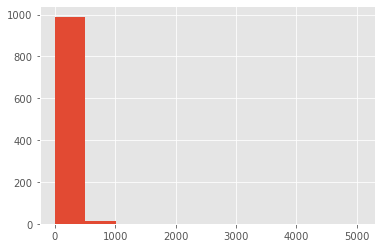

In [12]:
town[u'население'].hist()

На гистограмме видны только выбросы.

<AxesSubplot:>

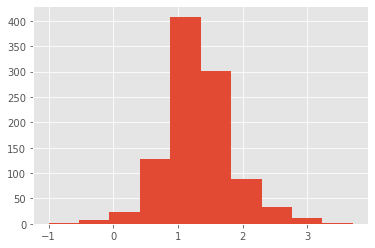

In [13]:
#Прологарифмируем исходные данные
df = pd.DataFrame(town)
x = np.log10(df[u'население'])
pd.Series(x).hist()

<AxesSubplot:>

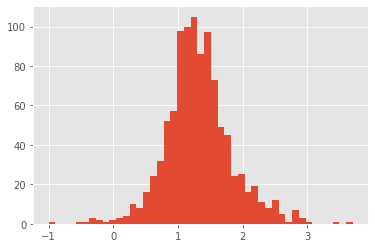

In [14]:
pd.Series(x).hist(bins=45)

На гистограмме видны 3 быброса: 1 пенек в левой части, 2 - в правой. Внешне распределение похоже на логнормальное, но все же не логнормальное.

## Пример 2. Швейцарские банкноты

Описание проблемы. Будем работать с данными из файла ```swiss_bank_notes.csv```, в которых находится информация о поддельных и настоящих купюрах (всего 200 наблюдений). Первые 100 из них подлинные, остальные 100 – фальшивые. Как подлинные, так и фальшивые банкноты измерялись, измерения приведены в файле данных. Хотим попробовать "на глаз", без применения методов машинного обучения, отличить фальшивые купюры от настоящих.

Описание переменных:
* Status (genuine, counterfeit) - происхождение банкноты (подлинная, поддельная).
* Length - длина банкноты.
* Left - высота слева.
* Right - высота справа.
* Bottom - кайма нижняя.
* Top - кайма верхняя.
* Diagonal - диагональ центральной картинки.

Происхождение данных. 
* Данные заимствованы из книги Flury and Riedwyl (1988), Multivariate statistics. A practical approach, London:Chapman & Hall.
* Данные обсуждались в книге Hardle, Simar Applied Multivariate Statistical Analysis.

Задача - отличить фальшивые купюры от настоящих на основе первичного анализа данных.

Начнём с чтения данных. Метод ```pandas.read_csv``` читает данные из текстового файла с разделителем (т.н. csv-файлы, comma-separated values) в объект DataFrame.

Полезные параметры:
* ```sep``` - задаёт символ-разделитель полей в файле (по умолчанию разделитель запятая);
* ```names``` - список названий колонок, если он не задан в файле;
* ```index_col``` - номер колонки с индексом.
* ```decimal``` - символ-разделитель для знаков после запятой.

Пара слов об аргументах функций.
Аргументы бывают именованные (задано имя аргумента) или позиционные (имя аргумента не задано).
Здесь ```swiss_bank_notes.csv``` - позиционный аргумент, имя файла. ```index_col=0``` - именованный аргумент. При вызове функции именованные аргументы обязаны следовать после позиционных.

Кроме этого, pandas поддерживает чтение большинства распространённых форматов данных, в частности Excel.

In [15]:
df = pd.read_csv('swiss_bank_notes.csv', index_col=0)

Посмотрим на данные. Используем метод ```DataFrame.head```, который выводит первые n строк таблицы (по умолчанию 5).

In [16]:
df.head()

,Status,Length,Left,Right,Bottom,Top,Diagonal
1,genuine,214.8,131.0,131.1,9.0,9.7,141.0
2,genuine,214.6,129.7,129.7,8.1,9.5,141.7
3,genuine,214.8,129.7,129.7,8.7,9.6,142.2
4,genuine,214.8,129.7,129.6,7.5,10.4,142.0
5,genuine,215.0,129.6,129.7,10.4,7.7,141.8


Также посмотрим, какова размерность данных. Для этого есть атрибут ```DataFrame.shape```. Информацию о количестве строк требуется знать чаще. Для этого можно применить уже знакомую функцию ```len```.

In [17]:
print(df.shape)
print(len(df))

(200, 7)
200


Посмотрим на типы данных.

In [18]:
df.dtypes

Status       object
Length      float64
Left        float64
Right       float64
Bottom      float64
Top         float64
Diagonal    float64
dtype: object

После того, как убедились, что данные считались корректно, хочется сделать их быстрый обзор. Для этого есть метод ```DataFrame.describe```, который для всех численных столбцов выводит:
* count - число значений в столбце без NA-значений (NA - not available, т.е. без пропусков);
* mean - среднее значение столбца;
* std - стандартное отклонение;
* min, max - наибольшее и наименьшее значение;
* 25%, 50%, 75% - перцентили.

In [19]:
df.describe()

,Length,Left,Right,Bottom,Top,Diagonal
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,214.896000,130.121500,129.956500,9.417500,10.650500,140.483500
std,0.376554,0.361026,0.404072,1.444603,0.802947,1.152266
min,213.800000,129.000000,129.000000,7.200000,7.700000,137.800000
25%,214.600000,129.900000,129.700000,8.200000,10.100000,139.500000
50%,214.900000,130.200000,130.000000,9.100000,10.600000,140.450000
75%,215.100000,130.400000,130.225000,10.600000,11.200000,141.500000
max,216.300000,131.000000,131.100000,12.700000,12.300000,142.400000


Для строкового признака (столбца) ```Status``` можно вывести распределение статусов с помощью метода ```Series.value_counts```.

In [20]:
df['Status'].value_counts()

genuine        100
counterfeit    100
Name: Status, dtype: int64

Перцентили дают не полную картину о распределении данных. Построим гистограммы для каждого измерения с помощью метода ```Series.hist```. Для этого нужно предварительно импортировать библиотеки ```matplotlib``` и ```matplotlib.pyplot```.

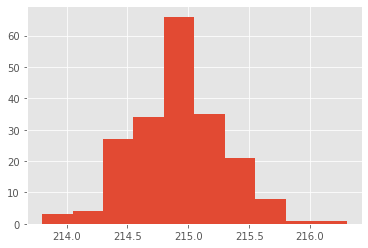

In [21]:
# Строим гистограмму для признака Length.
df['Length'].hist();

По оси y находится количество строчек, у которых ```Length``` попала в данный столбик. Это не всегда удобно, и хочется смотреть на долю столбика во всех имеющихся данных. Специальной функции для этого нет, так что приходится использовать следующий прием. Для каждой строчки нужно задать вес, равный числу, обратному длине рассматриваемого вектора.

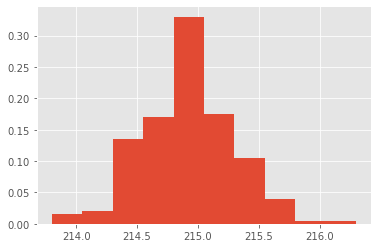

In [22]:
# Задаём список из 200 элементов, каждый из которых равен 1/200.
w = [1. / len(df)]*len(df)
# Передаём этот список функции hist как значение аргумента weights.
df['Length'].hist(weights=w);

Ещё данная гистограмма не устраивает нас тем, что она визуализирует смешанные данные по обоим классам ```counterfeit``` и ```genuine```. Хотелось бы, чтобы на гистограмме была видна разница в распределении по этим классам.

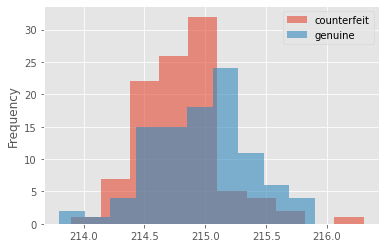

In [23]:
# По идее, вызов должен быть такой: df.groupby('Status')['Length'].hist(alpha=0.6)
# Но из-за бага https://github.com/pandas-dev/pandas/issues/10756
# приходится делать дополнительный вызов plot
df.groupby('Status')['Length'].plot.hist(alpha=0.6)
# Добавляем легенду
plt.legend();

Картинка красивая, но нисколько не отвечает на главный вопрос. Разницы в распределении между фальшивыми и настоящими купюрами практически нет. Но это мы построили распределения только одного признака. Можно построить аналогичным образом гистограммы и для остальных признаков. Но если колонок не очень много (а у нас их, действительно, не много), можно построить такую картинку, после которой всё станет ясно со всеми распределениями сразу.

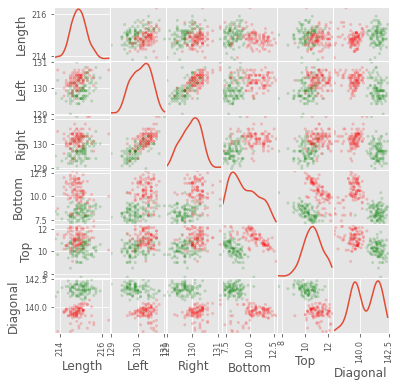

In [24]:
colors = {'genuine': 'green', 'counterfeit': 'red'}
scatter_matrix(df,
               # размер картинки
               figsize=(6, 6),
               # плотность вместо гистограммы на диагонали
               diagonal='kde',
               # цвета классов
               c=df['Status'].replace(colors),
               # степень прозрачности точек
               alpha=0.2,
              );

Теперь ясно, что в распределении диагоналей купюр наблюдается очевидное смешение двух нормальных распределений. Теперь, построим гистограммы этого признака для двух классов купюр, и дело прояснится.

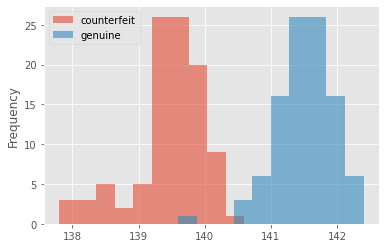

In [25]:
df.groupby('Status')['Diagonal'].plot.hist(alpha=0.6)
plt.legend(loc='upper left')

Можно построить отдельные диаграммы рассеяния, например, для пары признаков ```Top``` и ```Bottom```.

<AxesSubplot:xlabel='Top', ylabel='Bottom'>

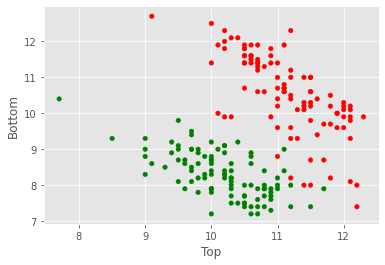

In [26]:
df.plot.scatter(x='Top', y='Bottom', c=df['Status'].replace(colors))

## Пример 3. Титаник

In [27]:
df = pd.read_csv('http://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv')
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [28]:
df.dtypes

Survived                     int64
Pclass                       int64
Name                        object
Sex                         object
Age                        float64
Siblings/Spouses Aboard      int64
Parents/Children Aboard      int64
Fare                       float64
dtype: object

In [29]:
df.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


In [30]:
for column in ['Survived', 'Pclass', 'Sex']:
    print(df[column].value_counts(normalize=True))

0    0.614431
1    0.385569
Name: Survived, dtype: float64
3    0.549042
1    0.243517
2    0.207441
Name: Pclass, dtype: float64
male      0.645998
female    0.354002
Name: Sex, dtype: float64


Хотим представить ту же информацию, но в картинках для отчёта.

In [31]:
# Нужно, чтобы подписи к картинкам отображались корректно по-русски
matplotlib.rc('font', family='Arial')

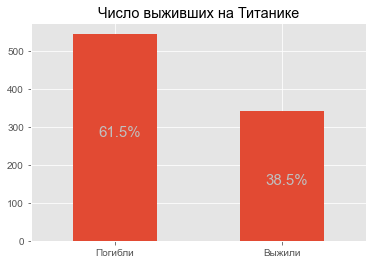

In [32]:
# Строим картинку
df['Survived'].value_counts().plot(kind='bar')
# Добавляем подпись
plt.title(u'Число выживших на Титанике')
plt.xticks([0, 1], ['Погибли', 'Выжили'], rotation=None)
plt.text(-0.1, 275, '61.5%', fontsize=15, color='silver')
plt.text(0.9, 150, '38.5%', fontsize=15, color='silver');

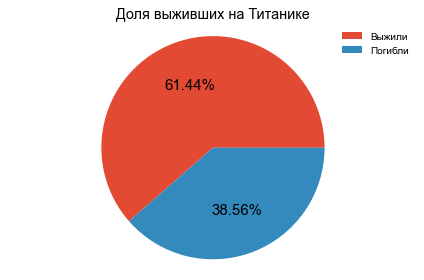

In [33]:
fig, ax = plt.subplots(1)
df['Survived'].value_counts().plot(kind='pie', labels=['', ''],
                                   ax=ax, autopct='%.2f%%', fontsize=15)
ax.set_title(u'Доля выживших на Титанике')
ax.axis('equal')
ax.legend(labels=[u'Выжили', u'Погибли'], framealpha=0)
ax.set_ylabel('')
plt.tight_layout()

**Boxplot (ящик с усами)**

Гистограммы информативны, но если нужно вывести много гистограмм на одной картинке, то всё смешается. В этом случае целесообразно использовать boxplot.

Text(0.5, 1.0, 'Распределение возраста')

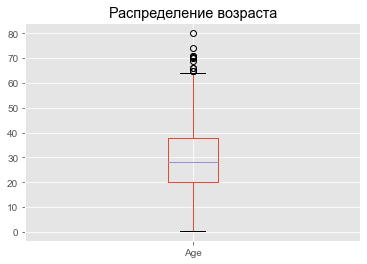

In [34]:
df['Age'].plot(kind='box')
plt.title(u'Распределение возраста')

И теперь пример с группировкий по классу пассажира.

Text(0.5, 0.98, '')

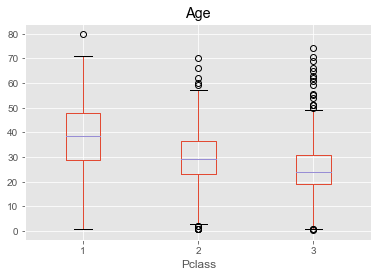

In [35]:
ax = df.boxplot(column='Age', by='Pclass')
# Хак для того, чтобы исправить наезжающие заголовки графика
ax.get_figure().suptitle('')